# Melbourne Housing Project



Using this data (https://www.kaggle.com/anthonypino/melbourne-housing-market) create a model (Linear Regression) to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer. The project should follow the guideline as:

    1.	Examine and explore data (visualization, interactions among features)
    2.	Apply the model for prediction with holdout and cross validation
    3.	Using PCA, apply the model with holdout and cross validation
    4.	Visualize the residue and homoscedasticity
    5.	Tune the model if necessary
    6.	Write up analysis for each section (for example, explain why the model is overfitting, explain why applying PCA is better, etc.)
    7.	Include conclusions for summary


# Content

## 1. Data pre-processing 
### 1.1 Importing Various Modules
### 1.2  Reading the data from a CSV file
### 1.3 Check missing values
### 1.4 Treat Missing Values

## 2. Exploratory Data Analysis
### 2.1 Rooms /Bedrooms/Bathrooms 
### 2.2 Regionname
### 2.3 Numeric Features
### 2.4 CORRELATION

## 3. Apply the model for prediction with holdout and cross validation

# 1. Data pre-processing 

## 1.1 Importing Various Modules

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for plotting graphs
%matplotlib inline
import numpy as np
import sklearn
import time
# Import model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## 1.2  Reading the data from a CSV file

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("Melbourne_housing_FULL.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### there is NaN value in price , BuildingArea,	YearBuilt columns

In [3]:
data.shape #show total columns & rows

(34857, 21)

### Some Key Details

**Suburb**: Suburb

**Address**: Address

**Rooms**: Number of rooms

**Price**: Price in Australian dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Type**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**SellerG**: Real Estate Agent

**Date**: Date sold

**Distance**: Distance from CBD in Kilometres

**Regionname**: General Region (West, North West, North, North east ...etc)

**Propertycount**: Number of properties that exist in the suburb.

**Bedroom2** : Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size in Metres

**BuildingArea**: Building Size in Metres

**YearBuilt**: Year the house was built

**CouncilArea**: Governing council for the area

**Lattitude**: Self explanitory

**Longtitude**: Self explanitory

## 1.3 Check missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

#### There is 8 categorial columns and 13 numeric column

In [5]:
# Identify object columns
print(data.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


## Check mean values

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


> YearBuild should be convert into AgeOfHouse 
> We found many unsual data :  BuildingArea = 0 , Landsize = 0,  

In [7]:
# Count of missing values   NaN
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
# Percentage of missing values
data.isnull().sum()/len(data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

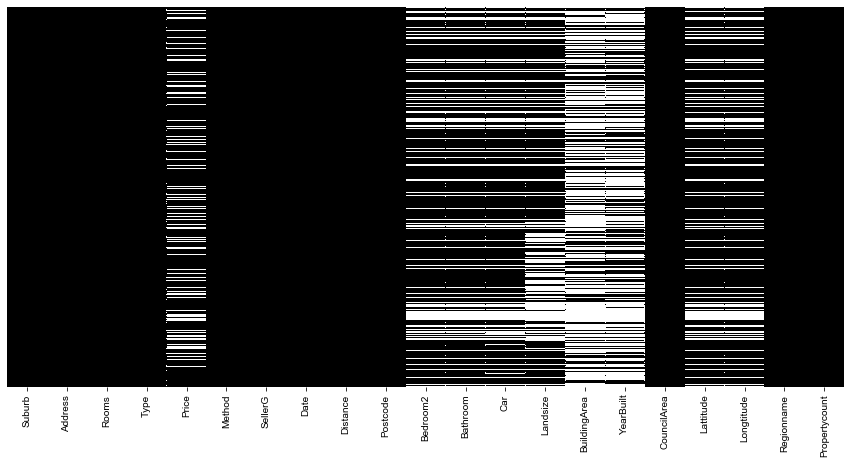

In [9]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [10]:
# df = data[data.Price.isnull()]
# df.head()
# bool_series = pd.isnull(data["Price"])  

###   There are a significant amount of missing values in Price,Bedroom2 , Bathroom, Car, Landsize, Building Area, YearBuilt, Council Area, Lattitude, and Longitude.

## 1.4 Treat Missing Values
### 1.4.1 Fix Missing values at bedroom columns

> Number of bedroom maybe equal number of rooms -1 

In [11]:
# creating bool series True for NaN values  
bool_series = pd.isnull(data["Bedroom2"])  
    
# filtering data  
# displaying data only with Bedroom2 = NaN  
data[bool_series]  

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10/12/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10/12/2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34838,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,24/02/2018,6.8,3016.0,NaN,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34839,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,24/02/2018,6.8,3016.0,NaN,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34840,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,24/02/2018,6.8,3016.0,NaN,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34844,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,24/02/2018,4.6,3181.0,NaN,NaN,NaN,NaN,NaN,NaN,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0


In [12]:
# filling a null values using fillna()  
data["Bedroom2"].fillna(abs(data["Rooms"] -1), inplace = True)

### 1.4.2 Fix Missing values at Lattitude Longtitude columns

Since we already have BuildingArea and Regionname  so that we can drop these columns      

In [13]:
data = data.drop(['Lattitude', 'Longtitude'], axis=1)

### 1.4.3 Fix Missing values at Car columns

> Missing value will be equaled mean value


In [14]:
data["Car"].fillna(round(data["Car"].mean()), inplace = True)

### 1.4.3 Fix Missing values at BuildingArea columns

> BuildingArea = Landsize * 70%


In [15]:
data["BuildingArea"].fillna(abs(data["Landsize"] * 0.7), inplace = True)

In [16]:
# data[pd.isnull(data["BuildingArea"]) ]  

### 1.4.4 Remove rows missing data 

In [17]:
data = data.dropna()

### Feature Engineering
 > YearBuild should be convert into AgeOfHouse 
 
 > Remove BuildingArea = 0 , Landsize = 0
 

In [18]:
# Add age variable
import time
currentYear, month, day, hour, min = map(int, time.strftime("%Y %m %d %H %M").split())
data['Age'] = currentYear - data['YearBuilt']


# Remove BuildingArea = 0 , Landsize = 0 
data = data[data['BuildingArea']!=0]
data = data[data['Landsize']!=0]

In [19]:
# Confirm that observations missing data were removed  
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9285 entries, 2 to 34856
Data columns (total 20 columns):
Suburb           9285 non-null object
Address          9285 non-null object
Rooms            9285 non-null int64
Type             9285 non-null object
Price            9285 non-null float64
Method           9285 non-null object
SellerG          9285 non-null object
Date             9285 non-null object
Distance         9285 non-null float64
Postcode         9285 non-null float64
Bedroom2         9285 non-null float64
Bathroom         9285 non-null float64
Car              9285 non-null float64
Landsize         9285 non-null float64
BuildingArea     9285 non-null float64
YearBuilt        9285 non-null float64
CouncilArea      9285 non-null object
Regionname       9285 non-null object
Propertycount    9285 non-null float64
Age              9285 non-null float64
dtypes: float64(11), int64(1), object(8)
memory usage: 1.5+ MB


In [20]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,9285.0,3.204739e+00,0.904998,1.0,3.0,3.0,4.0,12.0
Price,9285.0,1.149534e+06,683411.465806,131000.0,695000.0,952000.0,1400000.0,9000000.0
Distance,9285.0,1.159464e+01,6.800210,0.0,6.9,10.6,14.2,47.4
Postcode,9285.0,3.112230e+03,115.311904,3000.0,3044.0,3083.0,3149.0,3977.0
Bedroom2,9285.0,3.183630e+00,0.907620,0.0,3.0,3.0,4.0,12.0
Bathroom,9285.0,1.677544e+00,0.724901,0.0,1.0,2.0,2.0,9.0
Car,9285.0,1.758104e+00,0.991601,0.0,1.0,2.0,2.0,10.0
Landsize,9285.0,5.963502e+02,1142.887546,1.0,280.0,534.0,670.0,42800.0
BuildingArea,9285.0,1.999944e+02,370.853589,1.0,111.0,146.0,210.0,15190.0
YearBuilt,9285.0,1.963373e+03,37.753775,1196.0,1940.0,1970.0,1997.0,2019.0


#### the data is clean now. There are 9285 records so that the data is large enough to build the model


## 2. Exploratory Data Analysis By Price

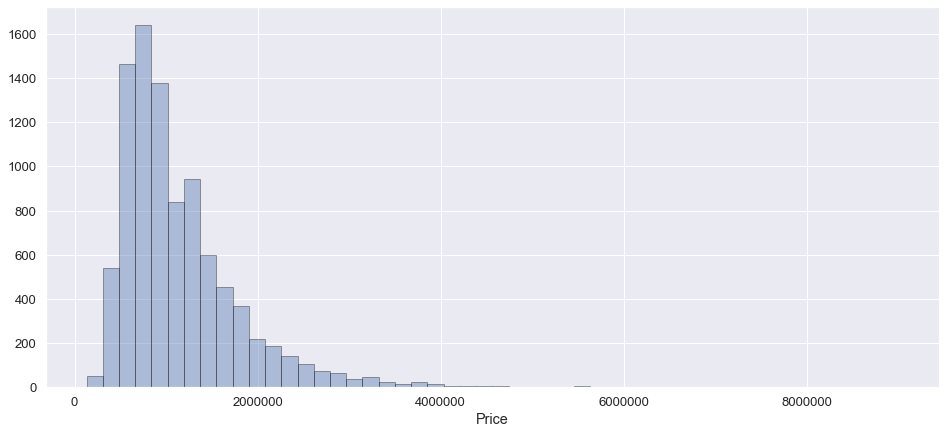

In [21]:
plt.figure(figsize=(16,7))
sns.distplot(data['Price'], kde = False,hist_kws=dict(edgecolor="k"))

> Almost price is between 900k ~ 1400K

### Rooms /Bedrooms/Bathrooms 

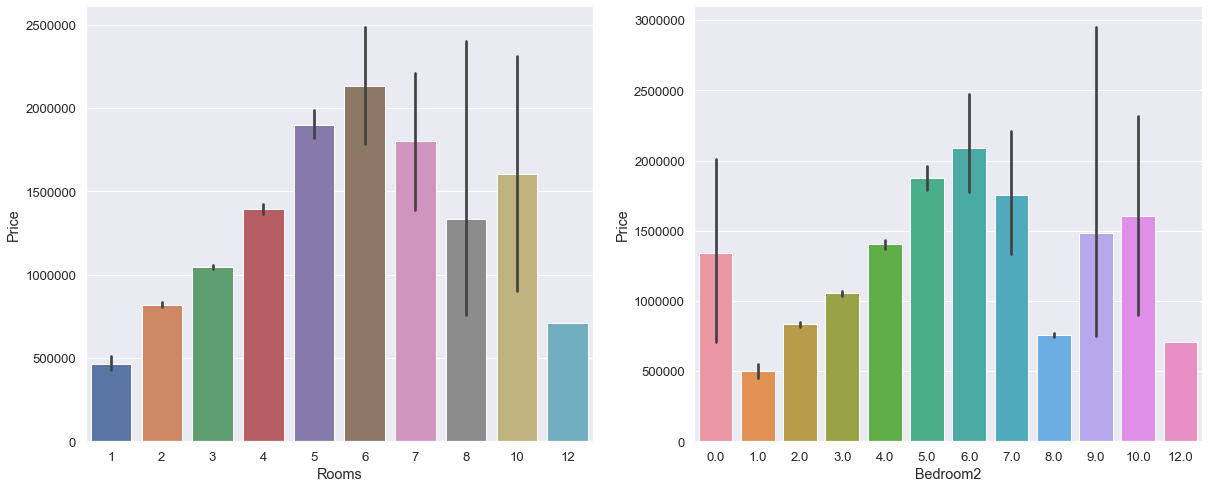

In [29]:


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
sns.factorplot(x="Rooms", y="Price",  data=data, kind="bar", ax = ax1)
sns.factorplot(x="Bedroom2", y="Price",  data=data, kind="bar",ax = ax2)
plt.close(2)
plt.close(3)
plt.show()


>  The number of rooms is effect on the price
> the house wwhich has from 5 - 7 rooms & bed room tend to have highest price


### Type of House

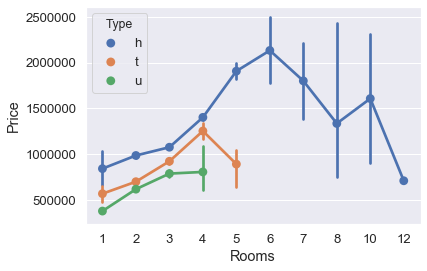

In [35]:
sns.pointplot(x='Rooms', y='Price', hue='Type',   data=data, kind="bar")

> The Price is affected by Type of house 

### Regionname

In [53]:

data.groupby('Regionname', as_index=False).agg({"Car": "mean","Price": "mean","Rooms": "mean", "SellerG":"count"})

,Regionname,Car,Price,Rooms,SellerG
0,Eastern Metropolitan,1.890653,1.150573e+06,3.473545,1134
1,Eastern Victoria,1.982456,6.639120e+05,3.491228,57
2,Northern Metropolitan,1.623091,9.270987e+05,3.002607,2685
3,Northern Victoria,2.138462,6.096769e+05,3.476923,65
4,South-Eastern Metropolitan,2.038741,9.208891e+05,3.438257,413
5,Southern Metropolitan,1.735786,1.645611e+06,3.239316,2691
6,Western Metropolitan,1.805657,8.997134e+05,3.203923,2192
7,Western Victoria,2.062500,4.396562e+05,3.541667,48


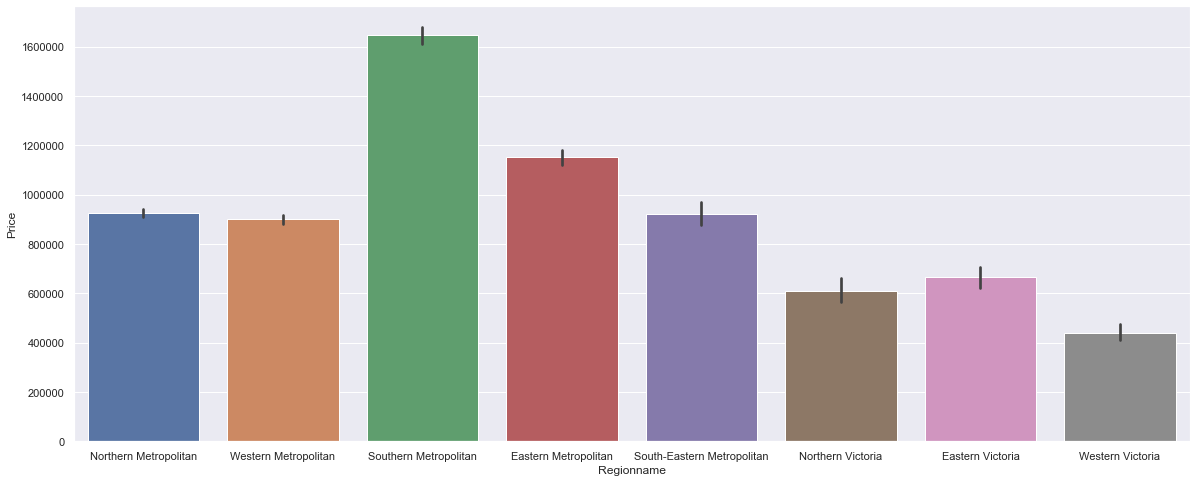

In [52]:
fig, (ax1) = plt.subplots(1,1,figsize=(20,8))
sns.factorplot(x="Regionname", y="Price",  data=data, kind="bar",ax = ax1)
plt.close(2)
plt.show()

>  The total sales in Northern Metropolitan , Southern Metropolitan, Western Metropolitan is highest.
> South-Eastern Metropolitan have total sales only  413 but the mean price is 9.208891e+05   -> potential market

### Numeric Features


In [55]:
data.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount', 'Age'],
      dtype='object')

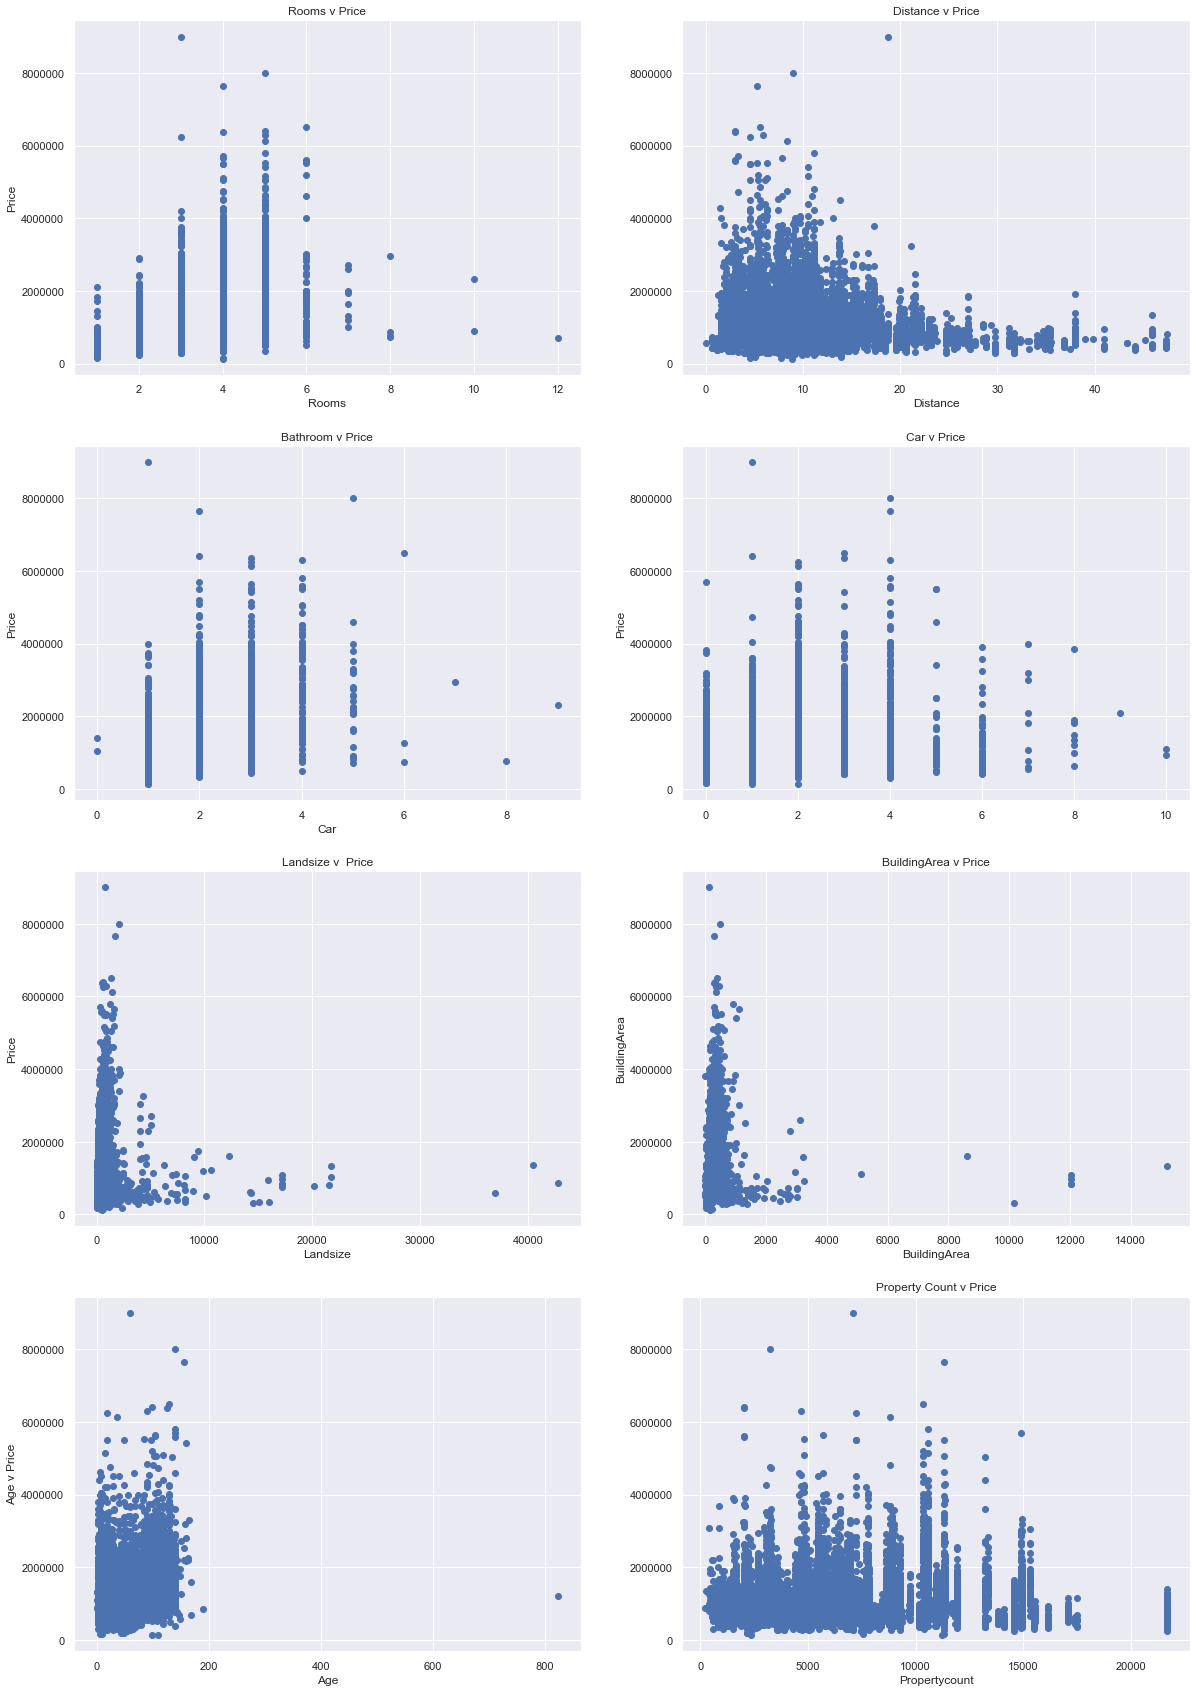

In [56]:
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = data, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = data, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = data, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = data, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = data, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = data, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

> the expensive houses have these characterictis :
         - Distance about 5- 20km
         - car from 2 -4 

### CORRELATION

> Regionname is categorial data so that we use oneHotEncoding to encode thí columns into nummeric 

In [94]:
dt_en = pd.get_dummies(data,columns=['Regionname'])

dt_en.head()




,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Propertycount,Age,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,4019.0,119.0,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,4019.0,119.0,0,0,1,0,0,0,0,0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,4019.0,5.0,0,0,1,0,0,0,0,0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,4019.0,109.0,0,0,1,0,0,0,0,0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,4019.0,129.0,0,0,1,0,0,0,0,0


Text(0.5, 1, 'Variable Correlation')

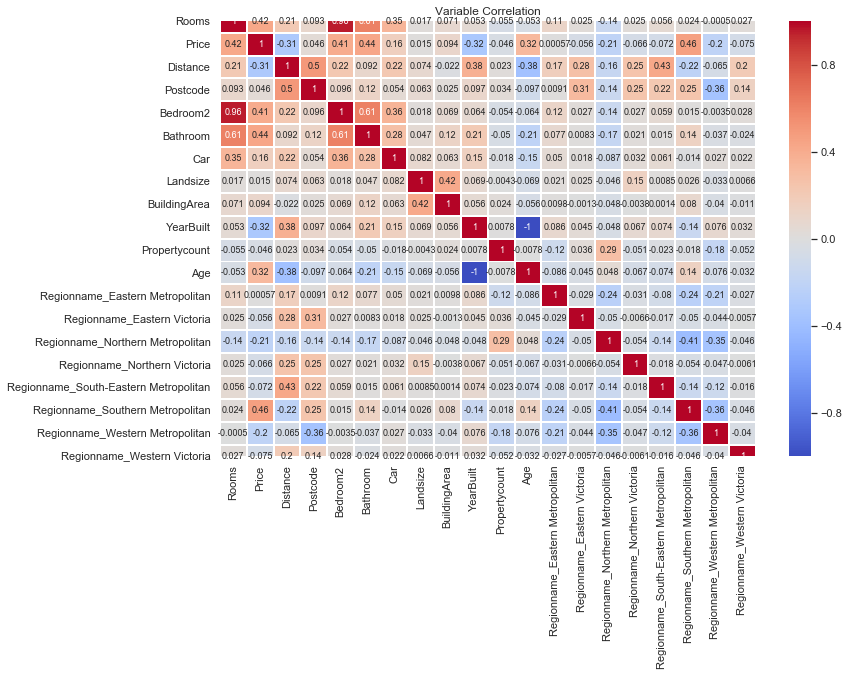

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(X_enc.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

> the correclation betweent bedroom2 and Rooms is 0.96 ( high) so that we can remove one of them

## 3. Apply the model for prediction with holdout and cross validation

In [72]:
data.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount', 'Age'],
      dtype='object')

In [247]:
# Split
# Create features variable 
X =data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]
# X = pd.get_dummies(data=X, drop_first=True)
# Create target variable
y = data['Price']

# Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [248]:
# Fit


# Create linear regression object
regressor = LinearRegression()
t0= time.time()
# Fit model to training data
results = regressor.fit(X_train,y_train)
print(f"training time: {round(time.time()-t0, 5)}") # the time would be round to 3 decimal in seconds


training time: 0.00499


In [249]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)
# print(X_test)
# print(y_pred)

In [150]:
df_t = pd.DataFrame({
    'Rooms': 3,
    'Distance': 18,
    'Bathroom' : 1,
    'Car' :0,
    'Landsize': 294.0,
    'BuildingArea' : 92.0,
    'Propertycount' : 4407.0,
    'Age' : 10
    
}, index=[0])
df_t
y_pred_2 = regressor.predict(df_t)
# print(df_t)
print(y_pred_2)

[331961.33310557]


In [91]:
print(regressor.coef_, regressor.intercept_)

[ 2.18667784e+05 -3.65759638e+04  2.42327021e+05  6.50070232e+04
  6.46167976e+00  1.37222660e+01  2.80358271e+00  4.39205517e+03
  3.21686128e+05 -2.52818598e+05  1.70422779e+05  1.83977211e+05
  2.83603278e+05 -2.87328753e+05 -3.57635406e+04] 128719.93536797201


In [103]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Rooms,193772.620714
Distance,-30314.577320
Bathroom,325844.722376
Car,59569.490733
Landsize,12.548878
BuildingArea,53.562573
Propertycount,-0.128586
Age,5513.569398


In [116]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25)

,Actual,Predicted
28789,441000.0,4.840224e+05
3435,700000.0,1.029894e+06
8781,439000.0,4.969516e+05
14520,1385000.0,7.906277e+05
19306,760000.0,5.825062e+05
33261,1600000.0,8.869407e+05
24588,1000000.0,1.107809e+06
19204,1215000.0,1.487903e+06
18943,724000.0,3.412225e+04
19089,1006000.0,1.151669e+06


### Regression Evaluation Metrics
Three common evaluation metrics for regresson problems:

    Mean Absolute Error (MAE)
    Mean Squared Error (MSE)
    Root Mean Squared Error (RMSE)
    All basic variations on the difference between what you predicted and the true values.
    Comparing these metrics:

    MAE is the easiest to understand, because it's the average error.
    MSE more popular than MAE, because MSE "punishes" larger errors, tends to be useful in the real world.
    RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units (target units) 

In [137]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R Squared:',metrics.r2_score(y_test,y_pred))
print('model score:',regressor.score(X_test, y_test))

MAE: 335877.0199478829
MSE: 242076299638.9072
RMSE: 492012.49947425845
R Squared: 0.47250301265658634
model score: 0.47250301265658634


### R Squared: 0.47 is too low -> this model is not good

> There are many factors that may have contributed to this inaccuracy, for example :
    - Need more data: We need to have a huge amount of data to get the best possible prediction.
    - Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
    - Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.


### Analyze the Residuals

Text(0, 0.5, 'Predictions')

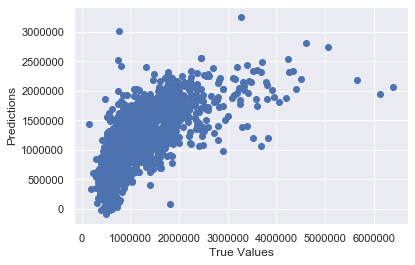

In [120]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

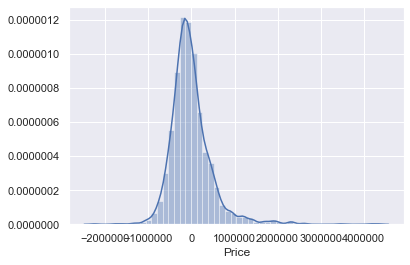

In [118]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

## k-folds cross-validation (k=10) 

In [143]:
# model = LinearRegression()
# scores = []
# kfold = KFold(n_splits=5, random_state=None, shuffle=False)
# kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# for i, (train, test) in enumerate(kfold.split(X, y)):
#     print(f" {train} , {test}")
# #     model.fit(X.loc[train,:], y.loc[train,:])
# #     score = model.score(X.iloc[test,:], y.iloc[test,:])
# #     scores.append(score)
# print(scores)

In [148]:
kfold = KFold(n_splits=10, random_state=100)
model_kfold = LinearRegression()
results_kfold = cross_val_score(model_kfold, X, y, cv=kfold)
model_kfold.fit(X,y)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 45.24%


In [151]:
df_t = pd.DataFrame({
    'Rooms': 3,
    'Distance': 18,
    'Bathroom' : 1,
    'Car' :0,
    'Landsize': 294.0,
    'BuildingArea' : 92.0,
    'Propertycount' : 4407.0,
    'Age' : 10
    
}, index=[0])
df_t
y_pred_2 = model_kfold.predict(df_t)
# print(df_t)
print(y_pred_2)

[331917.35056133]


### Analyze the Residuals

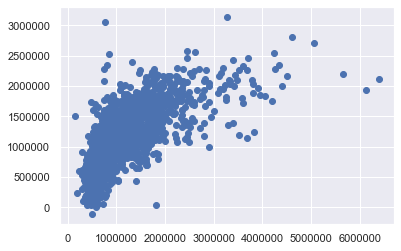

In [240]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

## 4. Using PCA, apply the model with holdout and cross validation
### 4.1 Using PCA, apply the model with holdout and cross validation to compare the speed

In [160]:
X

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Propertycount,Age
2,2,2.5,1.0,0.0,156.0,79.0,4019.0,119.0
4,3,2.5,2.0,0.0,134.0,150.0,4019.0,119.0
6,4,2.5,1.0,2.0,120.0,142.0,4019.0,5.0
11,3,2.5,2.0,0.0,245.0,210.0,4019.0,109.0
14,2,2.5,1.0,2.0,256.0,107.0,4019.0,129.0
...,...,...,...,...,...,...,...,...
34847,3,25.5,2.0,2.0,383.0,118.0,2940.0,3.0
34849,3,25.5,2.0,2.0,404.0,158.0,2940.0,7.0
34853,2,6.3,2.0,1.0,98.0,104.0,6543.0,1.0
34854,2,6.3,1.0,2.0,220.0,120.0,6543.0,19.0


In [241]:
# Split
# Create features variable 
X =data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]
# X = pd.get_dummies(data=X, drop_first=True)
# Create target variable
y = data['Price']

# Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

# PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set. To do this, execute the following code:
# sc = StandardScaler()
sc = MinMaxScaler(feature_range= (0,1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)





In [242]:
X_train

array([[0.18181818, 0.16877637, 0.22222222, ..., 0.0168543 , 0.421242  ,
        0.15674362],
       [0.18181818, 0.24050633, 0.22222222, ..., 0.01191652, 0.35386197,
        0.0109356 ],
       [0.18181818, 0.22362869, 0.33333333, ..., 0.02343801, 0.12340545,
        0.00243013],
       ...,
       [0.18181818, 0.21940928, 0.11111111, ..., 0.00980973, 0.0954161 ,
        0.08383961],
       [0.27272727, 0.1371308 , 0.22222222, ..., 0.00980973, 0.40283164,
        0.07168894],
       [0.18181818, 0.23628692, 0.22222222, ..., 0.00895385, 1.        ,
        0.05953827]])

In [243]:
#Applying PCA
#1.Fit(): Method calculates the parameters μ and σ and saves them as internal objects.
#2.Transform(): Method using these calculated parameters apply the transformation to a particular dataset.

# it means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained
pca = PCA(.8)  #      n_components=2
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [244]:
print(explained_variance)

[0.4591974  0.25687986 0.1419472 ]


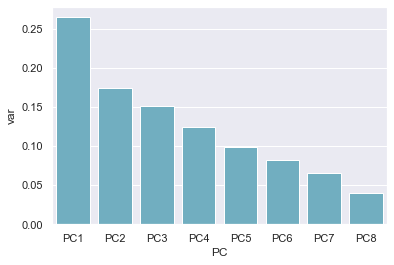

In [196]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC': ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'] })
sns.barplot(x='PC',y="var", 
           data=df, color="c");

### Apply Linear Regression to the Transformed Data

In [245]:
# Create linear regression object
regressor2 = LinearRegression()

# Fit model to training data
t0= time.time()
results = regressor2.fit(X_train,y_train)
print(f"training time: {round(time.time()-t0, 5)}") # the time would be round to 3 decimal in seconds
# Predicting test set results
y_pred = regressor2.predict(X_test)
# coeff_df = pd.DataFrame(regressor2.coef_, X.columns, columns=['Coefficient'])  
# coeff_df

training time: 0.002


In [246]:
print('model score:',regressor2.score(X_test, y_test))

model score: 0.30244375725297


> BEcause of the dataset is not too large so that we dont see the speed up time when applying  PCA

### 4.2 Using PCA with category data after oneHotencoding

> we will use onhotEncoding Regionname and  Type to build the model



In [265]:
regiondummy = pd.get_dummies(data['Regionname'])
typedummy = pd.get_dummies(data['Type'])

# Split
# Create features variable 
X =data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]

X =  pd.concat([X, regiondummy, typedummy], axis=1)
# X.head()
# Create target variable
y = data['Price']

# Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

# PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set. To do this, execute the following code:
# sc = StandardScaler()
sc = MinMaxScaler(feature_range= (0,1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# it means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained
pca = PCA(.8)  #      n_components=2
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.25611308 0.22509612 0.18438788 0.12303933 0.07735894]


In [266]:
# Create linear regression object
regressor2 = LinearRegression()

# Fit model to training data
t0= time.time()
results = regressor2.fit(X_train,y_train)
print(f"training time: {round(time.time()-t0, 5)}") # the time would be round to 3 decimal in seconds
# Predicting test set results
y_pred = regressor2.predict(X_test)
print('model score:',regressor2.score(X_test, y_test))

training time: 0.00198
model score: 0.34422388604757953


#### when  I change  pca = PCA(.8) -> PCA () get all PC  the score is higher : 0.6 but the training time is 0.007
 -> if using PCA  make the accuracy lower ????




# 4. Conclusion

> Every one unit increase in:

    Rooms is associated with an increase in Price by $193772
    Distance is associated with a decrease in Price by $-30314.84
    Bathroom is associated with an increase in Price by $325844
    Car space is associated with an increase in Price by $59569
    Landsize is associated with an increase in Price by $12
    BuildingArea is associated with an increase in Price by $53.562573
    Propertycount is associated with a decrease in Price by $-0.128586
    Age is associated with an increase in Price by $5513

Arrcording the report number of rooms is the most key factor affecting to the price

